# UFO predictions in the US

Dit Jupyter Notebook gaat ons vertellen over feiten en visualiseren van de UFO bezichtigingen en het 
inschatten van de volgende UFO bezichtiging. Een voorbeeld van zo'n visualisatie, zal als volgt eruit zien:

##### Geslacht ratio in Amerika:

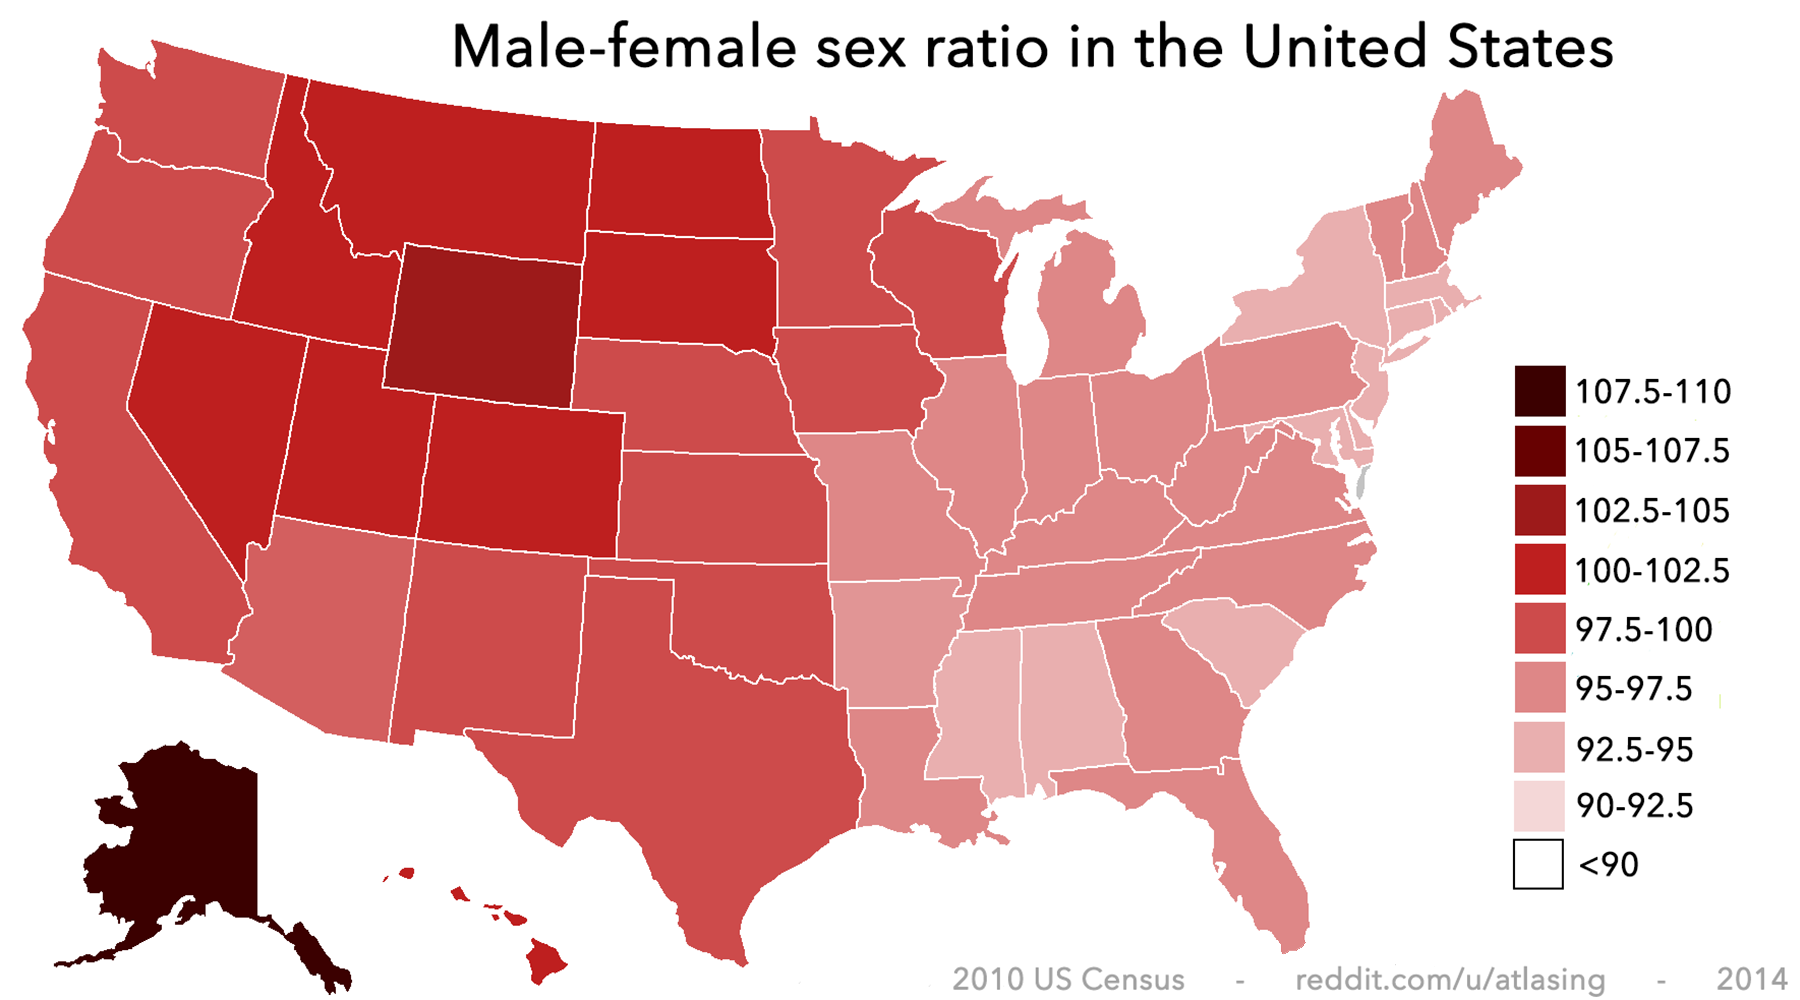

In [49]:
from IPython.display import Image
Image(filename='example_ratio.png') #bron: https://www.reddit.com/r/MapPorn/comments/21evhb/malefemale_sex_ratios_across_the_united_states/

### Table of contents: 
- Data Preparations
    * [Import Libraries](#import)
    * [Pandas Settings](#setting)
    * [UfoData Reading](#read)
- Data Usage
    * [Default Ufo Table](#def)
    * [Research Coordinates Ufo Table](#res_coord)
    * [Default Research Ufo Table](#res_def)
- [Vragen](#vragen)

#### Import Libraries: <a class="anchor" id="import"></a>

In [40]:
import pandas as pd
import numpy as np
# import geopandas

#### Pandas Settings <a class="anchor" id="setting"></a>

In [41]:
pd.set_option('display.max_colwidth',None)
pd.set_option('max_rows', 100)

#### Ufodata reading: <a class="anchor" id="read"></a>

In [42]:
read = pd.read_csv('ufo.csv', low_memory= False)
ufodata = pd.DataFrame(read) #Guy's benaming
ufo_data = pd.DataFrame(read) #Ruben's benaming

#####  Default Ufo table: <a class="anchor" id="def"></a>

In [43]:
indexNames = ufo_data[ ufo_data['shape'] == 'unknown' ].index
ufo_data.drop(indexNames , inplace=True) #delete unknown shapes
#------------
pd.set_option('display.max_colwidth', None) #increase comment column size
# -----------
default_ufo_information = ufo_data[['shape', 'city', 'country', 'datetime', 'comments']]
default_ufo_information.head() #get only shape, city, country, datetime and comments

,shape,city,country,datetime,comments
0,cylinder,san marcos,us,10/10/1949 20:30,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit
1,light,lackland afb,NaN,10/10/1949 21:00,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.
2,circle,chester (uk/england),gb,10/10/1955 17:00,Green/Orange circular disc over Chester&#44 England
3,circle,edna,us,10/10/1956 21:00,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home
4,light,kaneohe,us,10/10/1960 20:00,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan


#####  Research Coordinates Ufo Table <a class="anchor" id="res_coord"></a>

In [44]:
# Get research Coordinates Ufo table
indexNames = ufo_data[ ufo_data['latitude'] == 'unknown' ].index
ufo_data.drop(indexNames , inplace=True) #delete unknown latitude
#------------
pd.set_option('display.max_colwidth', None) #increase comment column size
# -----------
default_ufo_information = ufo_data[['latitude', 'longitude']]
default_ufo_information.head() #get only shape, city, country, datetime and comments

,latitude,longitude
0,29.8830556,-97.941111
1,29.38421,-98.581082
2,53.2,-2.916667
3,28.9783333,-96.645833
4,21.4180556,-157.803611


#####  Default Research Ufo table: <a class="anchor" id="res_def"></a>

In [45]:
# Get research Ufo table
indexNames = ufo_data[ ufo_data['shape'] == 'unknown' ].index
ufo_data.drop(indexNames , inplace=True) #delete unknown shapes
#------------
pd.set_option('display.max_colwidth', None) #increase comment column size
# -----------
default_ufo_information = ufo_data[['shape', 'latitude', 'longitude', 'datetime', 'duration (seconds)', 'duration (hours/min)']]
default_ufo_information.head() #get only shape, city, country, datetime and comments

,shape,latitude,longitude,datetime,duration (seconds),duration (hours/min)
0,cylinder,29.8830556,-97.941111,10/10/1949 20:30,2700,45 minutes
1,light,29.38421,-98.581082,10/10/1949 21:00,7200,1-2 hrs
2,circle,53.2,-2.916667,10/10/1955 17:00,20,20 seconds
3,circle,28.9783333,-96.645833,10/10/1956 21:00,20,1/2 hour
4,light,21.4180556,-157.803611,10/10/1960 20:00,900,15 minutes


In [73]:
read = pd.read_csv('nuforc_reports.csv')
ufodata2 = pd.DataFrame(read)
ufodata2 = ufodata2[['city', 'state', 'date_time', 'shape', 'duration']]
ufodata2 = ufodata2.dropna()
ufodata2

,city,state,date_time,shape,duration
0,Chester,VA,2019-12-12T18:43:00,light,5 seconds
1,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds
3,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds
4,Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes
5,Kirbyville,TX,2019-04-02T20:25:00,disk,15 minutes
...,...,...,...,...,...
88120,Tempe,AZ,2019-10-02T20:00:00,formation,3 minutes
88121,Bolivar,MO,2019-10-02T20:00:00,light,20 seconds
88122,North Port,FL,2019-10-02T20:03:00,formation,20 seconds
88123,Black Mountain,NC,2019-10-02T22:00:00,fireball,2 minutes


In [64]:
is_NaN = ufodata2.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ufodata2[row_has_NaN]

print(rows_with_NaN)

                              city state            date_time    shape  \
2                              NaN   NaN                  NaN      NaN   
9      Caloocan City (Philippines)   NaN  2019-06-06T19:00:00    other   
25                     Clarksville    TN  2019-07-25T19:06:00      NaN   
28                        Franklin    TN  2006-03-22T21:07:00  chevron   
29     Woodford Green (UK/England)   NaN  2006-02-06T04:30:00    other   
...                            ...   ...                  ...      ...   
88092                  Bakersfield    CA  2019-10-01T00:00:00    other   
88093                     Newburgh    IN  2019-10-01T00:00:00  diamond   
88094                     Newburgh    IN  2019-10-01T00:00:00  diamond   
88108                   Twin Falls    ID  2019-10-01T21:30:00   circle   
88117                      Hayfork    CA  2019-10-02T12:00:00      NaN   

             duration  
2                 NaN  
9      19:00 to 19:30  
25                NaN  
28             

In [46]:
ufodata.reset_index()
ufodata.set_index('country')
ufodata.columns

Index(['Unnamed: 0', 'datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (hours/min)', 'comments', 'date posted',
       'latitude', 'longitude', 'visit (seconds)'],
      dtype='object')

In [47]:
ufodata = ufodata[['datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (hours/min)', 'comments', 'date posted',
       'latitude', 'longitude', 'visit (seconds)']]

In [48]:
ufodata

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,visit (seconds)
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,4/27/2004,29.8830556,-97.941111,255
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,12/16/2005,29.38421,-98.581082,307
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,1/21/2008,53.2,-2.916667,280
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,1/17/2004,28.9783333,-96.645833,202
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,1/22/2004,21.4180556,-157.803611,255
...,...,...,...,...,...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,228
88675,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastly from rght to left.,9/30/2013,38.9011111,-77.265556,216
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White Elongated-Cigar Shaped Flashing lights&#44 NW of Oklahoma City,9/30/2013,35.6527778,-97.477778,176
88677,9/9/2013 23:00,starr,sc,us,diamond,0,2 nights,On September ninth my wife and i noticed strange lights in the sky. Two white lights and a red light. I had noticed this the night befo,9/30/2013,34.3769444,-82.695833,275


# Vragen <a class="anchor" id="vragen"></a>